In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/history.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback,MonthlyIncome
0,4578-PHJYZ,Male,0,Yes,Yes,52,Yes,No,DSL,No,...,Yes,No,One year,Yes,Electronic check,68.75,3482.85,No,I have been a customer with this internet prov...,6532
1,6289-CPNLD,Male,0,Yes,Yes,33,Yes,No,DSL,No,...,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05,Yes,I've been a customer with this company for ove...,7634
2,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,20.05,417.00,No,I have been a customer with this company for 2...,3628
3,5697-GOMBF,Female,1,Yes,Yes,28,No,No phone service,DSL,No,...,Yes,No,Month-to-month,Yes,Electronic check,35.90,973.65,No,I have been a customer with this internet prov...,7851
4,9717-QEBGU,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.30,144.00,No,I have been using the fiber optic internet ser...,1691


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure               object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
CustomerFeedback     object
MonthlyIncome         int64
dtype: object

## 1. Pré-processamento

In [4]:
df.shape

(5634, 23)

In [5]:
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        278
Churn                 0
CustomerFeedback      0
MonthlyIncome         0
dtype: int64

In [6]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

In [7]:
df.dropna(inplace=True)
df.shape

(5338, 23)

## 2. Análise descritiva

### 2.1. Variável Target: Churn

In [8]:
df['Churn'].value_counts()*100/df.shape[0]

Churn
No     73.679281
Yes    26.320719
Name: count, dtype: float64

### 2.2. Churn por Senioridade

In [9]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    4458
1     880
Name: count, dtype: int64

Importante observar que há muito menos clientes seniores do que o contrário.

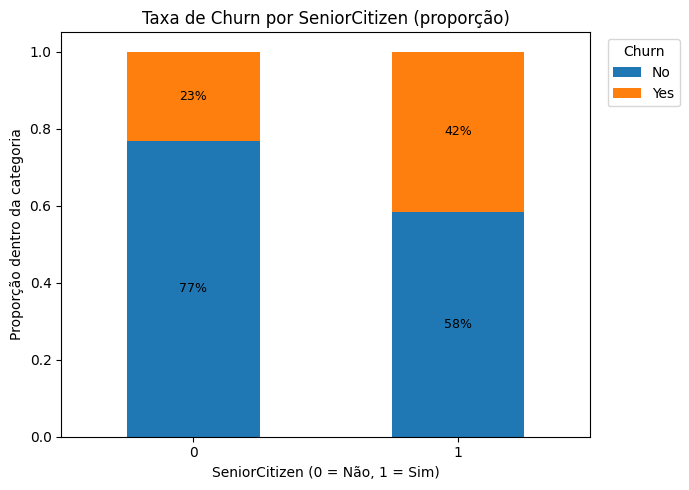

In [10]:
senior_x_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'])
pct_senior_x_churn = senior_x_churn.div(senior_x_churn.sum(axis=1), axis=0)

ax = pct_senior_x_churn.plot(kind='bar', stacked=True, figsize=(7,5), rot=0)
ax.set_ylabel('Proporção dentro da categoria')
ax.set_xlabel('SeniorCitizen (0 = Não, 1 = Sim)')
ax.set_title('Taxa de Churn por SeniorCitizen (proporção)')
ax.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')

for p in ax.patches:
    if p.get_height() > 0.01:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f"{p.get_height():.0%}", ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

A porcentagem de Churn é maior entre clientes sênior, indicando que a senioridade é um fator relevante.

### 2.3. Churn por gênero

In [11]:
df['gender'].value_counts()

gender
Male      2693
Female    2645
Name: count, dtype: int64

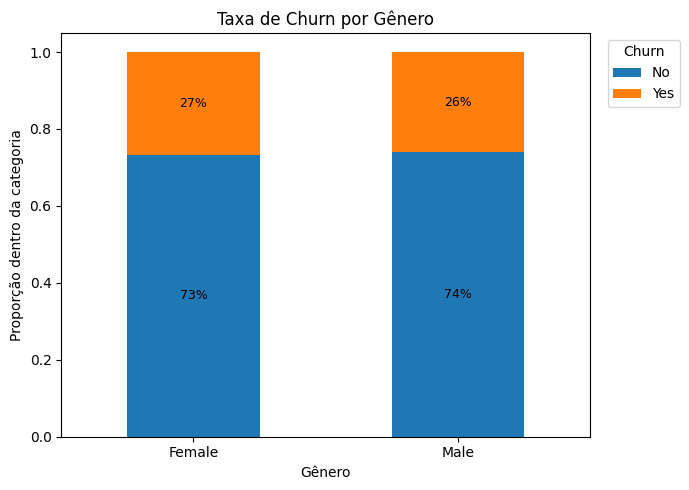

In [12]:
ct = pd.crosstab(df['gender'], df['Churn'])
pct = ct.div(ct.sum(axis=1), axis=0)

ax = pct.plot(kind='bar', stacked=True, figsize=(7,5), rot=0)
ax.set_ylabel('Proporção dentro da categoria')
ax.set_xlabel('Gênero')
ax.set_title('Taxa de Churn por Gênero')
ax.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')

for p in ax.patches:
    if p.get_height() > 0.01:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f"{p.get_height():.0%}", ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 2.4. Churn por existência de dependentes

In [13]:
df['Dependents'].value_counts()

Dependents
No     3740
Yes    1598
Name: count, dtype: int64

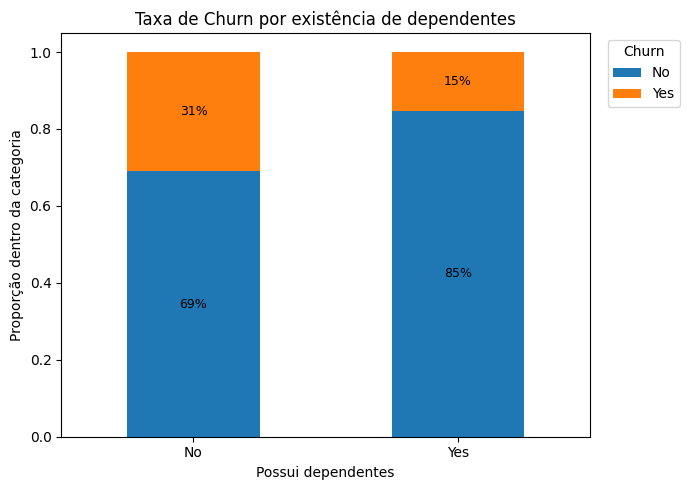

In [14]:
ct = pd.crosstab(df['Dependents'], df['Churn'])
pct = ct.div(ct.sum(axis=1), axis=0)

ax = pct.plot(kind='bar', stacked=True, figsize=(7,5), rot=0)
ax.set_ylabel('Proporção dentro da categoria')
ax.set_xlabel('Possui dependentes')
ax.set_title('Taxa de Churn por existência de dependentes')
ax.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')

for p in ax.patches:
    if p.get_height() > 0.01:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f"{p.get_height():.0%}", ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Pessoas com dependentes têm uma taxa de cancelamento levemente inferior. Esse resultado, entretanto, era previsível: O prejuízo do cancelamento é maior quando um número maior de pessoas depende do serviço, e, portanto, impõe mais obstáculos para a mudança de serviço.

### 2.5. Churn por tipo de contrato

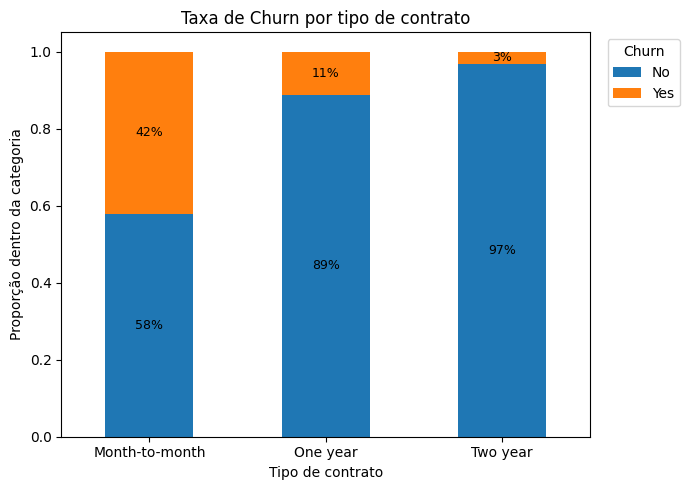

In [15]:
ct = pd.crosstab(df['Contract'], df['Churn'])
pct = ct.div(ct.sum(axis=1), axis=0)

ax = pct.plot(kind='bar', stacked=True, figsize=(7,5), rot=0)
ax.set_ylabel('Proporção dentro da categoria')
ax.set_xlabel('Tipo de contrato')
ax.set_title('Taxa de Churn por tipo de contrato')
ax.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')

for p in ax.patches:
    if p.get_height() > 0.01:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f"{p.get_height():.0%}", ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Quanto mais extenso o contrato, menor a probabilidade de Churn. Aqui, há duas possibilidades:

1. O contrato mais longo pode ter cláusulas que dificultem o cancelamento (ex: Multa por quebra do contrato);
2. O cliente que contrata o plano de mais longo prazo provavelmente já possui uma maior confiança nos serviços da empresa, e, naturalmente, não será negativamente surpreendido com grande facilidade.

Independente de qual seja o caso, a equipe de vendas estimular contratos mais longos pode ser uma prática positiva para empresa.

### 2.6. Churn por internet service

In [16]:
df['InternetService'].value_counts()

InternetService
Fiber optic    2333
DSL            1837
No             1168
Name: count, dtype: int64

Há um balanceamento entre clientes com Fibra Ótica e DSL.

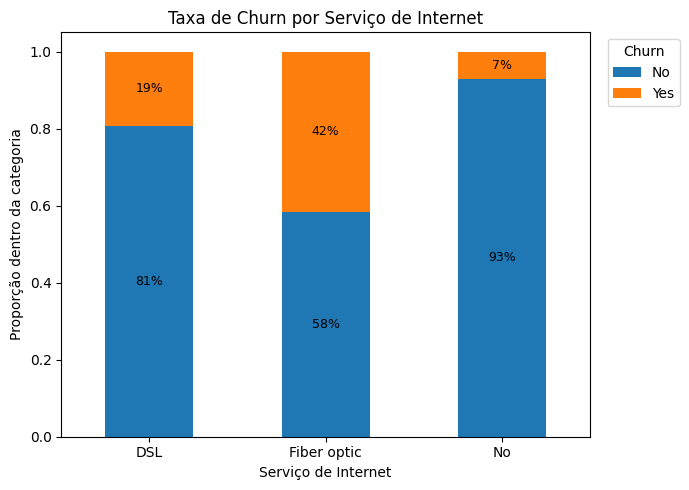

In [17]:
ct = pd.crosstab(df['InternetService'], df['Churn'])
pct = ct.div(ct.sum(axis=1), axis=0)

ax = pct.plot(kind='bar', stacked=True, figsize=(7,5), rot=0)
ax.set_ylabel('Proporção dentro da categoria')
ax.set_xlabel('Serviço de Internet')
ax.set_title('Taxa de Churn por Serviço de Internet')
ax.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left')

for p in ax.patches:
    if p.get_height() > 0.01:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f"{p.get_height():.0%}", ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

A análise indica que o serviço de Fibra Ótica gera mais insatisfação entre os clientes, tendo a maior taxa de Churn - tanto em comparação com clientes que assinam DSL quanto com a média.

### 2.7. Churn por tenure (tempo de clientela)

In [18]:
df['tenure'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,5338.0,32.441551,24.46419,1.0,9.0,29.0,55.0,72.0


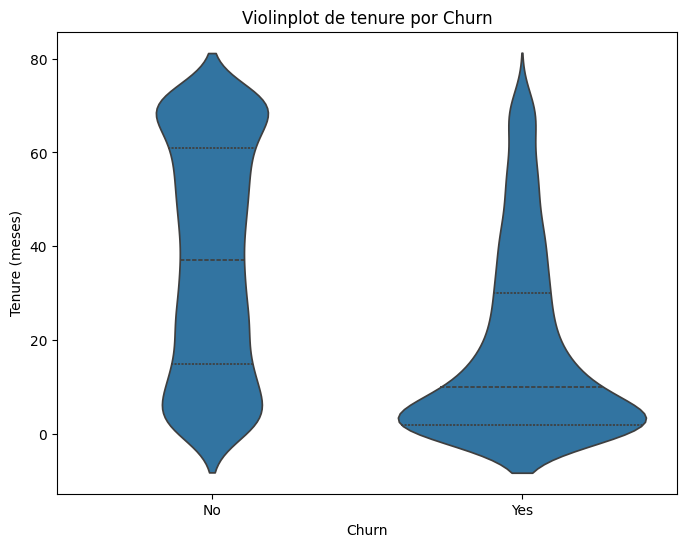

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# --- PREPARAÇÃO ---
# supondo que df já exista e tenha colunas 'tenure' (numérica) e 'Churn' ('Yes'/'No')
data = df[['tenure', 'Churn']].copy()
data = data.dropna(subset=['tenure', 'Churn'])

# garantir tipos corretos
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
data = data.dropna(subset=['tenure'])

# --- OPÇÃO 3: Violinplot (mostra densidade) ---
plt.figure(figsize=(8,6))
sns.violinplot(x='Churn', y='tenure', data=data, inner='quartile')
plt.title('Violinplot de tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')
plt.show()


In [30]:
df['tenureCategory'] = df['tenure'].apply(
    lambda x:
    '0-11' if x < 12
    else '12-23' if x < 24
    else '24-35' if x < 36
    else '36-47' if x < 48
    else '48+'
)
df['tenureCategory'].value_counts()

tenureCategory
48+      1743
0-11     1558
12-23     792
24-35     670
36-47     575
Name: count, dtype: int64

### 2.8. Churn por mensalidade

In [20]:
df['MonthlyCharges'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5338.0,64.481191,30.095448,18.4,35.1,70.25,89.65,118.65


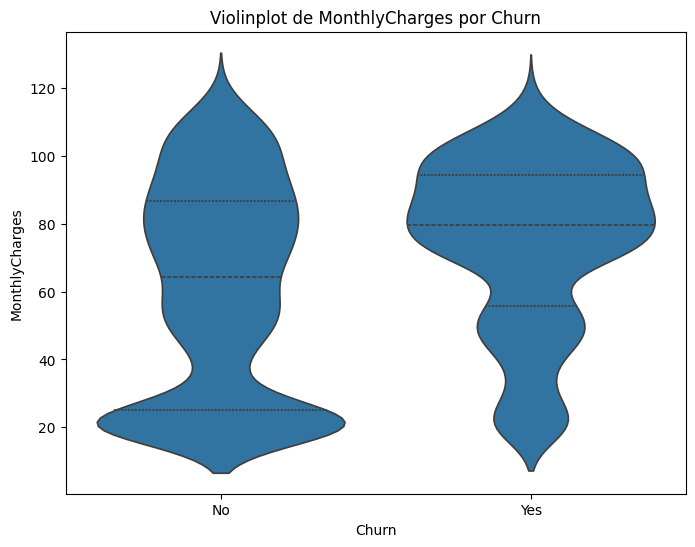

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# --- PREPARAÇÃO ---
# supondo que df já exista e tenha colunas 'tenure' (numérica) e 'Churn' ('Yes'/'No')
data = df[['MonthlyCharges', 'Churn']].copy()
data = data.dropna(subset=['MonthlyCharges', 'Churn'])

# garantir tipos corretos
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data = data.dropna(subset=['MonthlyCharges'])

# --- OPÇÃO 3: Violinplot (mostra densidade) ---
plt.figure(figsize=(8,6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=data, inner='quartile')
plt.title('Violinplot de MonthlyCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

Os cancelamentos são mais frequentes entre os clientes que pagam uma mensalidade mais alta. Fazer promoções e dar descontos pode ser uma saída para manter um cliente.

In [32]:
df['MonthlyChargesCategory'] = df['MonthlyCharges'].apply(
    lambda x:
    '0-40' if x <= 40
    else '41-80' if x <= 80
    else '80+'
)
df['MonthlyChargesCategory'].value_counts()

MonthlyChargesCategory
80+      1999
41-80    1924
0-40     1415
Name: count, dtype: int64

## 3. Modelos

### 3.1. Utilizando bag-of-words na coluna Feedback

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df['CustomerFeedback'], df['Churn'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       781
         Yes       1.00      1.00      1.00       287

    accuracy                           1.00      1068
   macro avg       1.00      1.00      1.00      1068
weighted avg       1.00      1.00      1.00      1068



Os textos da coluna feedback têm indicativos claros da decisão final do cliente em cancelar ou não cancelar o plano. Por esta razão, o modelo consegue prever com grande facilidade qual será o resultado final, desde que os textos sigam esse mesmo padrão (indicando **overfit**). Neste sentido, não é ideal que utilizemos a coluna `CustomerFeedback`, uma vez que não oferece uma previsão generalista.

### 3.2. Aplicando Regressão Logística

In [113]:
ds = df.copy()
drop_cols = ['TotalCharges', 'CustomerFeedback', 'customerID', 'tenure', 'MonthlyCharges', 'MonthlyIncome']
ds.drop(columns=drop_cols, inplace=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score  
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# labelencoder = LabelEncoder()
# categorical_cols = [
#     'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
#     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
#     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
#     'tenureCategory', 'MonthlyChargesCategory'
# ]
# for col in categorical_cols:
#     ds[col] = labelencoder.fit_transform(ds[col])

In [114]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'tenureCategory', 'MonthlyChargesCategory'
]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = ds.drop(['Churn'], axis=1)
y = ds['Churn']

ohe = OneHotEncoder(handle_unknown='ignore', drop='first')  # drop para evitar dummy trap
ct = ColumnTransformer([
    ('cat', ohe, categorical_cols)
], remainder='passthrough')

X = ct.fit_transform(X)

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       799
           1       0.52      0.80      0.63       269

    accuracy                           0.76      1068
   macro avg       0.72      0.77      0.73      1068
weighted avg       0.82      0.76      0.78      1068



In [117]:
print(accuracy_score(y_test, y_pred))

0.7621722846441947


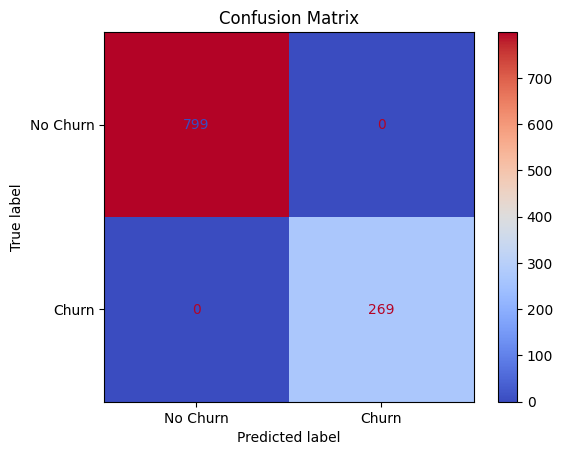

In [112]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()

### 3.3. Aplicando LightGBM Classifier

In [129]:
ds = df.copy()
drop_cols = ['TotalCharges', 'CustomerFeedback', 'customerID', 'tenure', 'MonthlyCharges', 'MonthlyIncome']
ds.drop(columns=drop_cols, inplace=True)

In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = ds.drop(['Churn'], axis=1)
y = ds['Churn']

ohe = OneHotEncoder(handle_unknown='ignore', drop='first')  # drop para evitar dummy trap
ct = ColumnTransformer([
    ('cat', ohe, categorical_cols)
], remainder='passthrough')

X = ct.fit_transform(X)

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [146]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(class_weight='balanced', n_estimators=100, learning_rate=0.05, num_leaves=31)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[LightGBM] [Info] Number of positive: 1136, number of negative: 3134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 4270, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\vinic\Desktop\Insper\InsperData\Hackathon_Terra_Signal\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       799
           1       0.53      0.75      0.62       269

    accuracy                           0.77      1068
   macro avg       0.72      0.76      0.73      1068
weighted avg       0.81      0.77      0.78      1068



In [148]:
print(accuracy_score(y_test, y_pred))

0.7687265917602997


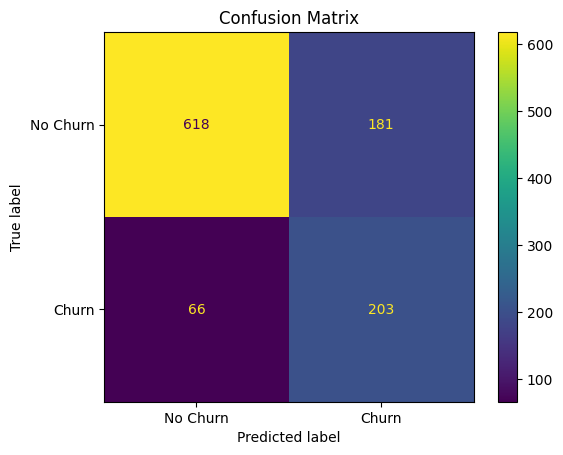

In [150]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### 3.4. Aplicando RandomForest

In [ ]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [126]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [127]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.78


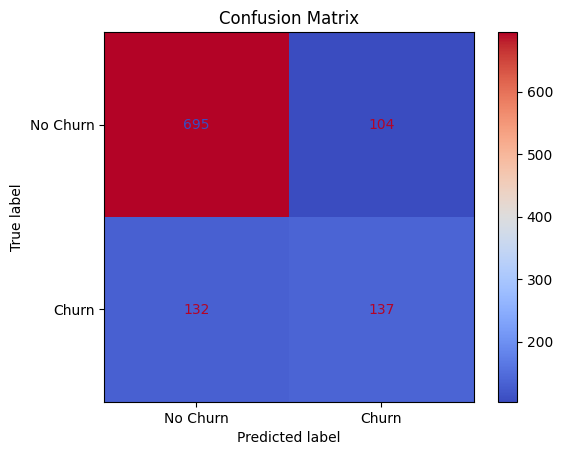

In [128]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()